In [2]:
# Load face data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
from scipy.io import loadmat

# Load the face data from the .mat file
face_data = loadmat('face.mat')
Y = face_data['Y']  # Assuming Y is the key for the images
ids = face_data['id'].flatten()  # Assuming id is the key for the ground truth labels

# Reshape Y to a list of 2D arrays, one for each image
num_images = Y.shape[2]
faces = [Y[:, :, i] for i in range(num_images)]


# Difussion maps

[8.05102466e-04 9.60165105e-04 9.67283541e-04 1.19339335e-03
 1.29879466e-03 1.35080382e-03 1.43771155e-03 1.51909307e-03
 1.68579919e-03 1.82570172e-03 2.01662519e-03 2.49219866e-03
 2.55291025e-03 2.71637577e-03 2.85201866e-03 3.01875996e-03
 3.24985000e-03 3.51023391e-03 4.18660380e-03 6.12269684e-03
 7.23662904e-03 8.28240424e-03 9.19255051e-03 1.08469688e-02
 1.15170830e-02 2.11055405e-02 2.21463269e-02 3.18999657e-02
 4.45117735e-02 6.88369637e-02 9.91633742e-02 2.15635949e-01
 1.00000000e+00]
[4, 2, 5, 6, 3, 1, 7, 8, 9, 11, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 22, 24, 21, 29, 30, 33, 31, 28, 32, 25, 26, 27]
Ordering by Ground Truth Labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
Ordering by Diffusion Maps: [ 4  2  5  6  3  1  7  8  9 11 10 12 13 14 15 16 17 18 19 20 23 22 24 21
 29 30 33 31 28 32 25 26 27]


Kendall's Tau: 0.856
P-value: 0.000


Ordered Faces by Diffusion maps


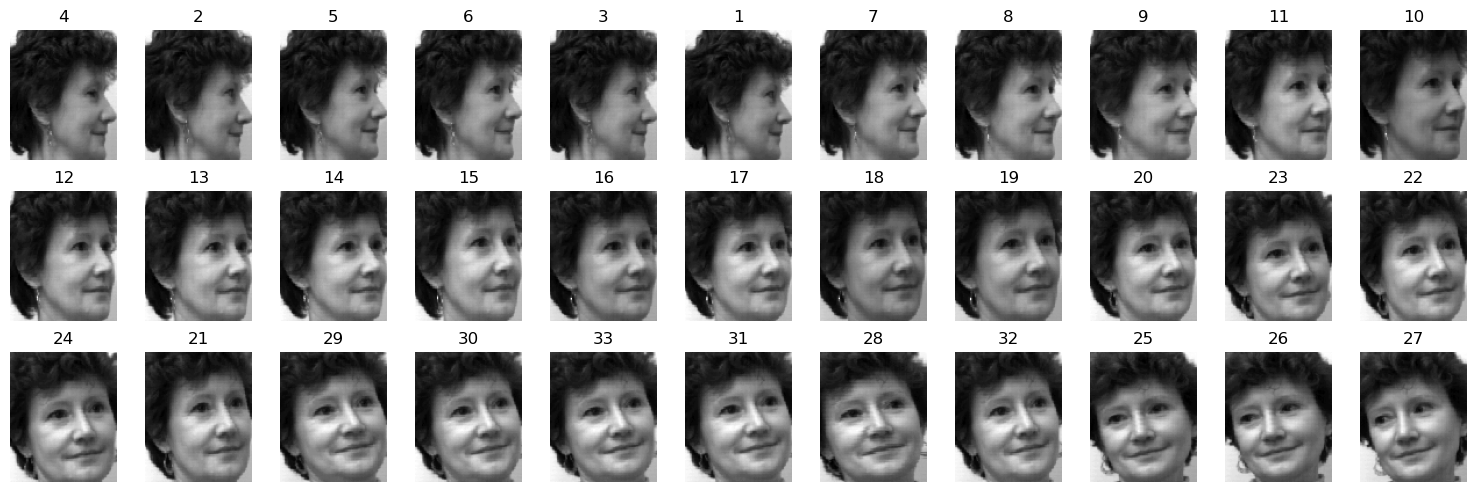

Ordered Faces by Ground Truth Labels


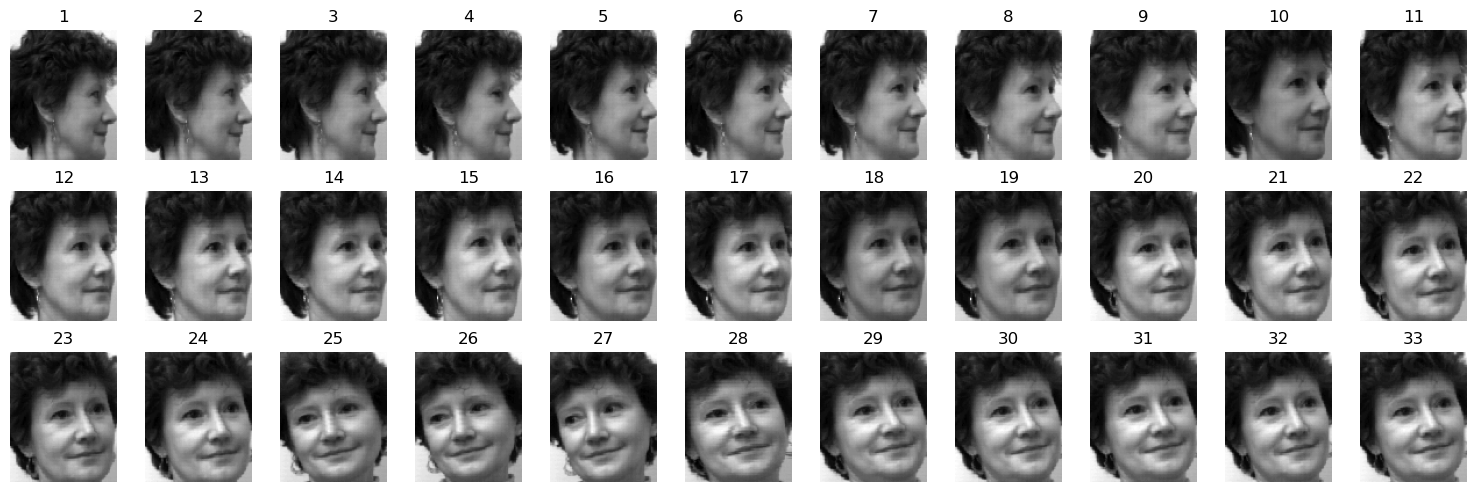

In [25]:
# Difussion maps
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
from scipy.io import loadmat
from scipy.stats import kendalltau


# Flatten each 2D image into a 1D array and stack them into a 2D array
processed_faces = np.array([face.flatten() for face in faces])

# Compute the pairwise Euclidean distance matrix
dist_matrix = pairwise_distances(processed_faces, metric='euclidean')

# Construct the affinity matrix using a Gaussian kernel
epsilon = np.median(dist_matrix)
#print(epsilon)
#epsilon = 6000
affinity_matrix = np.exp(-dist_matrix ** 2 / (2. * epsilon ** 2))

# Construct the diagonal degree matrix
degree_matrix = np.diag(affinity_matrix.sum(axis=1))

# Compute the adjacency_matrix
D_sqrt_inv = np.linalg.inv(degree_matrix ** 0.5)
adjacency_matrix = D_sqrt_inv @ affinity_matrix @ D_sqrt_inv

# Perform eigen-decomposition on the Laplacian
eigenvalues, eigenvectors = eigh(adjacency_matrix)

# Diffusion time parameter t
t = 10  # This can be tuned

# Scale the eigenvectors by the diffusion time
scaled_eigenvectors = np.dot(eigenvectors, np.diag(eigenvalues ** t))
print(eigenvalues)

# Order the faces based on the diffusion map embedding
ordered_indices_diffusion = np.argsort(scaled_eigenvectors[:, -2])
ordered_faces_diffusion = [faces[i] for i in ordered_indices_diffusion]

# Get the ordering of the ground truth labels
ordered_indices_ground_truth = np.argsort(ids)
#ordered_indices_ground_truth_modified = np.array([18,3,28,27,24,6,23,17,31,21,25,16,15,29,2,5,8,11,30,26,1,12,19,13,14,0,32,7,4,10,22,20,9])
#ordered_indices_ground_truth = np.copy(ordered_indices_ground_truth_modified)
ordered_faces_ground_truth = [faces[i] for i in ordered_indices_ground_truth]

order_diffusion = ids[ordered_indices_diffusion]
order_G = ids[ordered_indices_ground_truth]

# Compare the orderings
print("Ordering by Ground Truth Labels:", order_G)
print("Ordering by Diffusion Maps:", order_diffusion)


# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(ids[ordered_indices_diffusion], ids[ordered_indices_ground_truth])
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')


# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face, order in zip(axes, ordered_faces_diffusion, ordered_diffusion):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))
#plt.suptitle()  # Use suptitle for the entire figure
print('Ordered Faces by Diffusion maps')
plt.savefig('Diffusion_maps.png', bbox_inches='tight', dpi=300)
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

# Plot ordered faces by ground truth labels in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face, order in zip(axes, ordered_faces_ground_truth, order_G):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))

print('Ordered Faces by Ground Truth Labels')
plt.savefig('Groud_truth_images.png', bbox_inches='tight', dpi=300)
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()



# MDS (random_state=42)

c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS Ordering: [ 8  9 10  6  5  7 11  4 12  3 13  2 14  1 15 16 17 18 20 19 21 22 23 24
 30 29 31 33 32 28 25 26 27]
Ground Truth Ordering: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


Kendall's Tau: 0.712
P-value: 0.000


Ordered Faces by MDS


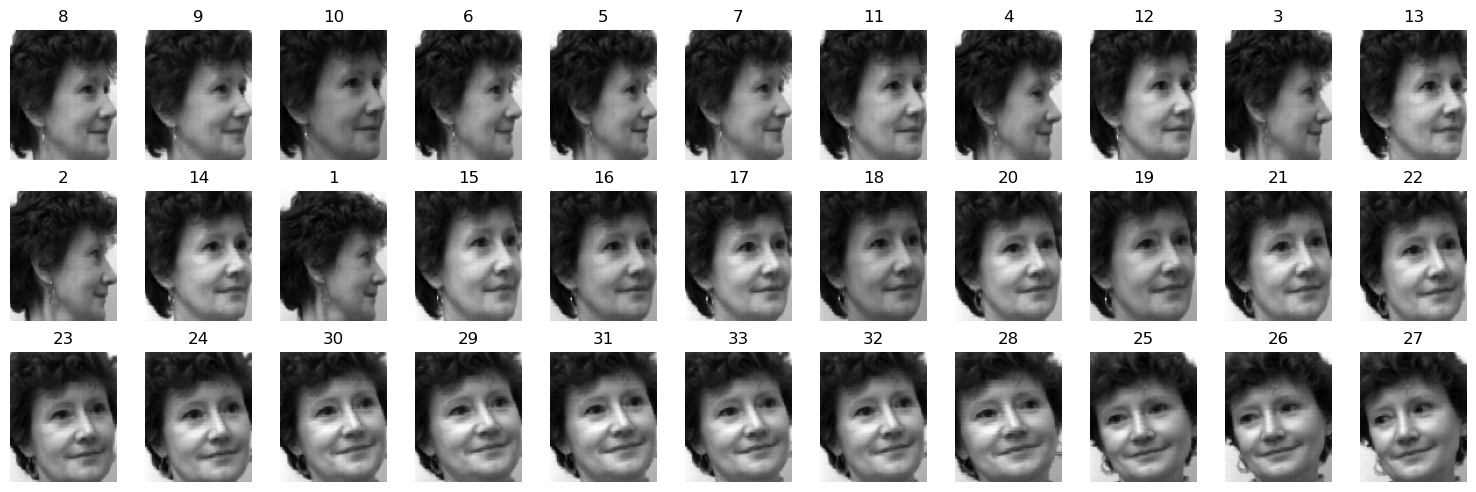

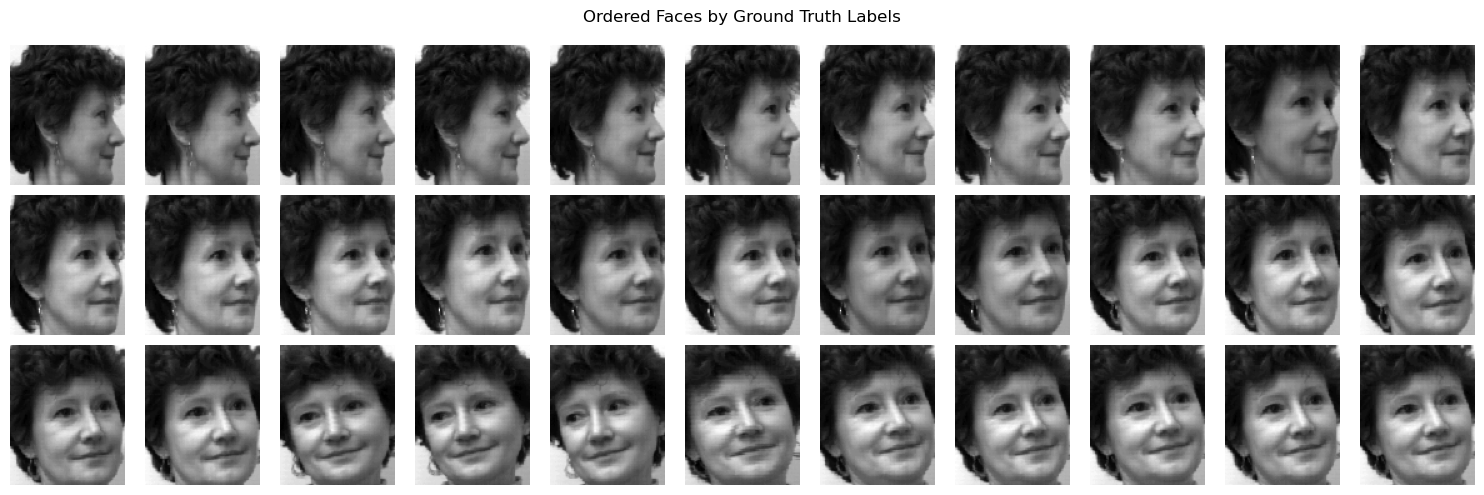

In [34]:
# MDS (random_state=42)
from sklearn.manifold import MDS

# Reshape Y to a 2D array where each row is a flattened image
num_images = Y.shape[2]
faces = np.array([Y[:, :, i].flatten() for i in range(num_images)])

# Initialize the MDS object
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)

# Fit the MDS to your data (flattened images)
mds_embedding = mds.fit_transform(faces)

# Sorting the images by the first MDS component
sorted_indices_mds = np.argsort(mds_embedding[:, 0])
#print(sorted_indices_mds)
#sorted_indices_mds = sorted_indices_mds[::-1]
#print(sorted_indices_mds)
sorted_faces_mds = faces[sorted_indices_mds]


order_MDS = ids[sorted_indices_mds]
order_G = ids[np.argsort(ids)]

# Compare with ground truth
print("MDS Ordering:", order_MDS)
print("Ground Truth Ordering:", order_G)


# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(order_MDS, order_G)
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')


# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face, order in zip(axes, sorted_faces_mds, order_MDS):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))
#plt.suptitle()  # Use suptitle for the entire figure
print('Ordered Faces by MDS')
plt.savefig('MDS_rand42.png', bbox_inches='tight', dpi=300)
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()



# Plot ordered faces by ground truth labels in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face in zip(axes, ordered_faces_ground_truth):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')

plt.suptitle('Ordered Faces by Ground Truth Labels')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


# MDS (random_state=100)

c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS Ordering: [ 1  2  4  3  5  6  7  8 23  9 24 33 11 32 22 30 31 12 10 29 20 13 21 17
 14 16 18 15 27 19 26 25 28]
Ground Truth Ordering: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


Kendall's Tau: 0.439
P-value: 0.000


Ordered Faces by MDS


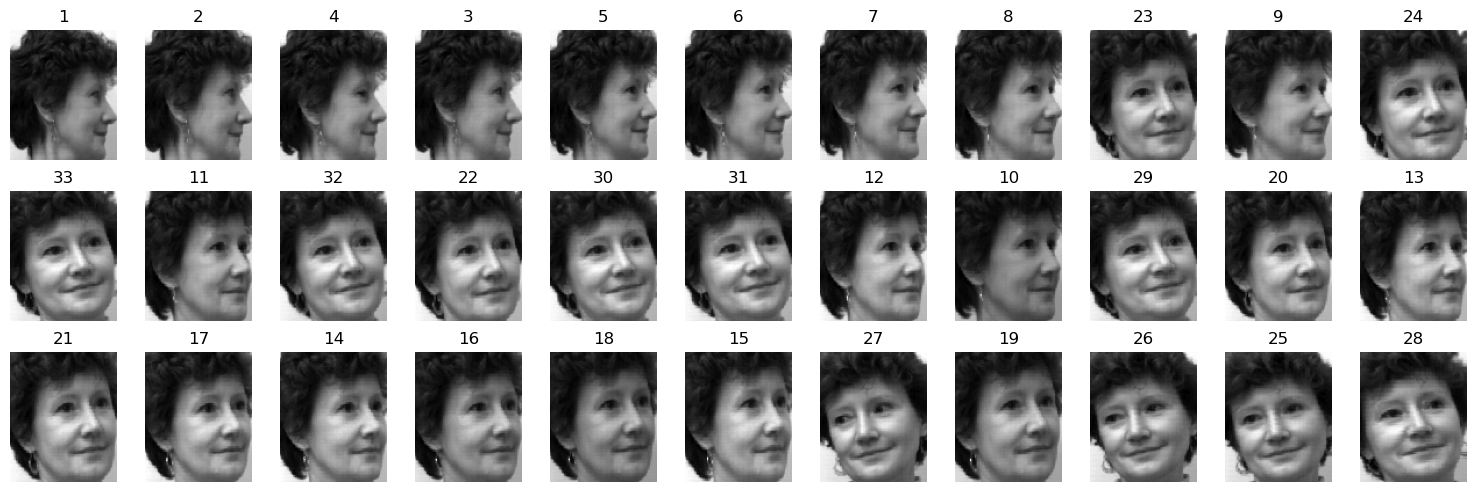

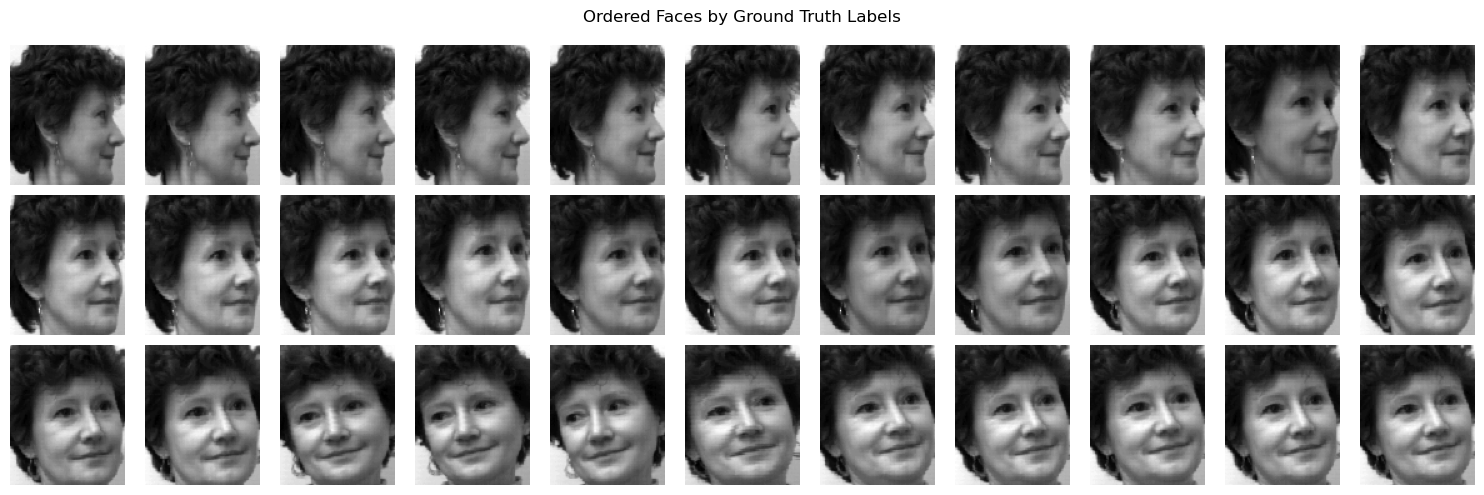

In [33]:
# MDS (random_state=100)
from sklearn.manifold import MDS

# Reshape Y to a 2D array where each row is a flattened image
num_images = Y.shape[2]
faces = np.array([Y[:, :, i].flatten() for i in range(num_images)])

# Initialize the MDS object
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=100)

# Fit the MDS to your data (flattened images)
mds_embedding = mds.fit_transform(faces)

# Sorting the images by the first MDS component
sorted_indices_mds = np.argsort(mds_embedding[:, 0])
#print(sorted_indices_mds)
sorted_indices_mds = sorted_indices_mds[::-1]
#print(sorted_indices_mds)
sorted_faces_mds = faces[sorted_indices_mds]


order_MDS = ids[sorted_indices_mds]
order_G = ids[np.argsort(ids)]

# Compare with ground truth
print("MDS Ordering:", order_MDS)
print("Ground Truth Ordering:", order_G)


# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(order_MDS, order_G)
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')


# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face, order in zip(axes, sorted_faces_mds, order_MDS):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))
#plt.suptitle()  # Use suptitle for the entire figure
print('Ordered Faces by MDS')
plt.savefig('MDS_rand100.png', bbox_inches='tight', dpi=300)
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()



# Plot ordered faces by ground truth labels in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face in zip(axes, ordered_faces_ground_truth):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')

plt.suptitle('Ordered Faces by Ground Truth Labels')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


# MDS with 100 runs

c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\f\Programfiles\Anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppres

Average MDS Ordering: [10 12 13 11 14  4 28  5 15  6  8  3  7  9 16 17 25  1  2 33 19 18 22 21
 26 20 30 32 24 23 27 31 29]
Ground Truth Ordering: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


Kendall's Tau: 0.477
P-value: 0.000




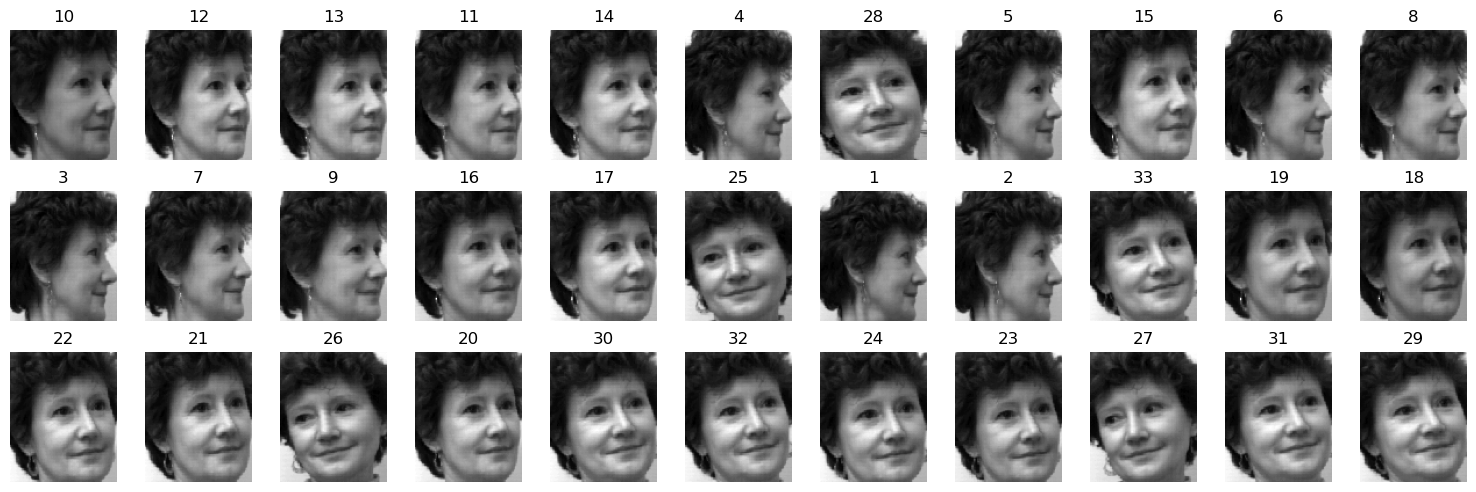

In [32]:
# MDS with 100 runs
# Initialize the Borda count scores
borda_counts = np.zeros(num_images)

# Run MDS with 100 different random seeds and update Borda counts
for seed in range(100):
    mds = MDS(n_components=2, dissimilarity='euclidean', random_state=seed)
    mds_embedding = mds.fit_transform(faces)
    sorted_indices_mds = np.argsort(mds_embedding[:, 0])
    
    # Update Borda counts (higher index gets lower score)
    for idx, image_index in enumerate(sorted_indices_mds):
        borda_counts[image_index] += (num_images - idx - 1)

# Get the ordering of the ground truth labels
ordered_indices_ground_truth = np.argsort(ids)
ordered_faces_ground_truth = [faces[i] for i in ordered_indices_ground_truth]

# Rank images based on Borda count scores
average_order_indices_MDS = np.argsort(-borda_counts)

order_MDS= ids[average_order_indices_MDS]
order_G = ids[ordered_indices_ground_truth]

print("Average MDS Ordering:", order_MDS)
print("Ground Truth Ordering:", order_G)

# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(order_MDS, order_G)
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')




# Plot the ordered faces in a 3x11 grid based on the average order
fig, axes = plt.subplots(3, 11, figsize=(15, 5))
axes = axes.flatten()

for ax, idx, order  in zip(axes, average_order_indices_MDS, order_MDS):
    ax.imshow(faces[idx].reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))

#plt.suptitle('Ordered Faces by Average MDS Ranking')
plt.tight_layout()
plt.savefig('average_mds_ordering.png', bbox_inches='tight', dpi=300)
plt.show()